## Classificação de estrelas - Redes Neurais

## 1. Importando bibliotecas

In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

## 2. Carregando dataset

In [4]:
df = pd.read_csv('star_classification.csv')


### 2.1. Informações do dataset


In [5]:
df.shape #QUANTIDADE DE LINHAS | QUANTIDADE DE COLUNAS

(100000, 18)

In [6]:
df.info() #INFORMAÇÕES DA TABELA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [7]:
df.isnull().sum() #VALORES NULOS

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [8]:
df.head(10) #IMPRIMINDO AS 10 PRIMEIRAS INFORMAÇÕES

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
5,1.237680e+18,340.995121,20.589476,23.48827,23.33776,21.32195,20.25615,19.54544,8102,301,3,110,5.658977e+18,QSO,1.424659,5026,55855,741
6,1.237679e+18,23.234926,11.418188,21.46973,21.17624,20.92829,20.60826,20.42573,7773,301,2,462,1.246262e+19,QSO,0.586455,11069,58456,113
7,1.237679e+18,5.433176,12.065186,22.24979,22.02172,20.34126,19.48794,18.84999,7773,301,2,346,6.961443e+18,GALAXY,0.477009,6183,56210,15
8,1.237661e+18,200.290475,47.199402,24.40286,22.35669,20.61032,19.46490,18.95852,3716,301,5,108,7.459285e+18,GALAXY,0.660012,6625,56386,719
9,1.237671e+18,39.149691,28.102842,21.74669,20.03493,19.17553,18.81823,18.65422,5934,301,4,122,2.751763e+18,STAR,-0.000008,2444,54082,232


### 2.2. Dividindo o dataset em atributos e classes

In [9]:
classes = df['class'].unique()
print(classes)

['GALAXY' 'QSO' 'STAR']


In [10]:
# Convertendo as classes em valores numéricos
LE = LabelEncoder()
#df['class'] = LE.fit_transform(df['class'])

In [11]:
df['class'].value_counts() #VERIFICAÇÃO DE BALANCEAMENTO

GALAXY    59445
STAR      21594
QSO       18961
Name: class, dtype: int64

In [12]:
y = df['class'] # Classes/Labels
df = df.drop(['class'], axis = 1)
x = df.iloc[:, 0:17].values # Atributos/Features

In [13]:
df.iloc[:, 0:17].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  redshift     100000 non-null  float64
 14  plate        100000 non-null  int64  
 15  MJD          100000 non-null  int64  
 16  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7)
memory usage: 13.0 MB


In [14]:
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,0.116123,6121,56187,842


In [15]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42, k_neighbors=5)
dataset_res, ouput_label = sm.fit_resample(x, y)

In [16]:
ouput_label.value_counts()

GALAXY    59445
QSO       59445
STAR      59445
Name: class, dtype: int64

## 3. Dividindo o dataset em treino e teste

In [17]:
# Dividindo os dados em treino e teste em 80% e 20% respectivamente
entrada_treino, entrada_test, saida_treino, saida_test = train_test_split(dataset_res, ouput_label, test_size=0.2)

# Padronizando os dados de entrada (X) para média 0 e desvio padrão 1
sc = StandardScaler()
sc.fit(entrada_treino)
x_treino_padrao = sc.fit_transform(entrada_treino)
x_test_padrao = sc.transform(entrada_test)

# Convertendo as classes em valores numéricos
# Uma classe será representada por um vetor de 3 posições, onde apenas uma posição será 1 e as outras 0
# Exemplo: GALAXY = [1, 0, 0]
#          QSO = [0, 1, 0]
#          STAR = [0, 0, 1]
# Fazemos isso, pois o algoritmo de aprendizado de máquina espera os dados sejam representadas por valores numéricos
saida_treino_onehot = pd.get_dummies(saida_treino).values
saida_test_onehot = pd.get_dummies(saida_test).values

In [18]:
print(saida_test_onehot)

[[0 1 0]
 [0 0 1]
 [0 0 1]
 ...
 [0 1 0]
 [0 1 0]
 [1 0 0]]


## 4. Criando o modelo

Documentação

https://keras.io/api/layers/activations/

https://keras.io/api/layers/core_layers/dense/

https://keras.io/api/optimizers/

In [19]:
# Modelo de rede perceptron multicamadas com uma camada oculta de 64 neurônios
# e camada de saída com 3 neurônios (3 classes)
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(4690, input_dim=17, activation='sigmoid', name='oculta'))
model.add(tf.keras.layers.Dense(3, activation='softmax', name='saida'))
model.summary() #visualizando o modelo

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 oculta (Dense)              (None, 4690)              84420     
                                                                 
 saida (Dense)               (None, 3)                 14073     
                                                                 
Total params: 98,493
Trainable params: 98,493
Non-trainable params: 0
_________________________________________________________________


### 4.1. Compilando o modelo

In [20]:
# Compile model
# Otimizador Adam com taxa de aprendizado de 0.01
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
# Função de custo categorical_crossentropy (para problemas de classificação com mais de duas classes)
# Métrica de avaliação MSE (Mean Squared Error)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['mse'])

### 4.2. Treinando o modelo

In [21]:
# Train model
history = model.fit(x_treino_padrao, saida_treino_onehot, validation_split=0.2, epochs=50)

Epoch 1/50
3567/3567 [==============================] - 24s 6ms/step - loss: 0.4607 - mse: 0.0543 - val_loss: 0.3294 - val_mse: 0.0510
Epoch 2/50
3567/3567 [==============================] - 32s 9ms/step - loss: 0.2007 - mse: 0.0299 - val_loss: 0.1476 - val_mse: 0.0236
Epoch 3/50
3567/3567 [==============================] - 22s 6ms/step - loss: 0.1572 - mse: 0.0247 - val_loss: 0.1207 - val_mse: 0.0192
Epoch 4/50
3567/3567 [==============================] - 23s 6ms/step - loss: 0.1316 - mse: 0.0215 - val_loss: 0.1126 - val_mse: 0.0188
Epoch 5/50
3567/3567 [==============================] - 22s 6ms/step - loss: 0.1227 - mse: 0.0197 - val_loss: 0.1142 - val_mse: 0.0192
Epoch 6/50
3567/3567 [==============================] - 23s 6ms/step - loss: 0.1103 - mse: 0.0185 - val_loss: 0.0984 - val_mse: 0.0164
Epoch 7/50
3567/3567 [==============================] - 22s 6ms/step - loss: 0.1045 - mse: 0.0174 - val_loss: 0.0941 - val_mse: 0.0158
Epoch 8/50
3567/3567 [==============================] -

## 5. Visualizando o erro

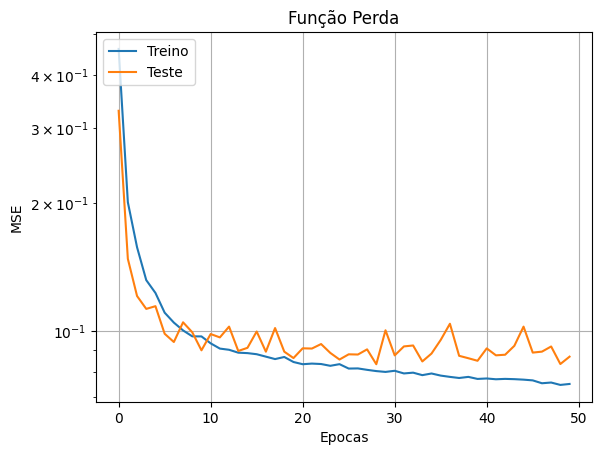

In [34]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.yscale("log")
plt.title('Função Perda')
plt.ylabel('MSE')
plt.xlabel('Epocas')
plt.legend(['Treino', 'Teste'], loc='upper left')
plt.grid()
plt.show()


In [38]:
pd.DataFrame(history.history).to_csv('custo.csv')

## 6.Métricas: Avaliação do modelo

In [23]:
output_model_ = np.argmax(model.predict(x_test_padrao), axis=-1)
y_test_class = np.argmax(saida_test_onehot, axis=-1)

1115/1115 [==============================] - 3s 3ms/step


In [24]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print('Acurácia:', accuracy_score(y_test_class, output_model_))
print('Precisão:', precision_score(y_test_class, output_model_, average='macro'))
print('Sensibilidade:', recall_score(y_test_class, output_model_, average='macro'))
print('F1-Score:', f1_score(y_test_class, output_model_, average='macro'))

Acurácia: 0.9762525583873047
Precisão: 0.9763270187411198
Sensibilidade: 0.976412251465034
F1-Score: 0.9762938304280947


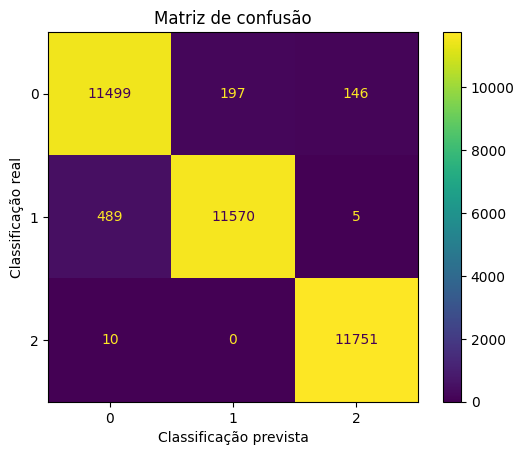

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test_class, output_model_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
disp.ax_.set_title('Matriz de confusão')
disp.ax_.set_xlabel('Classificação prevista')
disp.ax_.set_ylabel('Classificação real')
plt.show()


## 7. Salvar Modelo

In [27]:
model.save('model.h5')